In [1]:
"River water quality prediction"

'River water quality prediction'

In [1]:
# To Work with Data - the main Python libraries
import numpy as np
import pandas as pd
# For Visualization
import matplotlib.pyplot as plt
# For Modeling and Prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Download training data
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,target,1,2,3,4,5,6,7
0,0,1.10,0.69,1.04,NaN,NaN,NaN,NaN,NaN
1,3,0.41,0.71,0.72,NaN,NaN,NaN,NaN,NaN
2,4,1.70,2.21,2.21,NaN,NaN,NaN,NaN,NaN
3,5,0.62,0.60,0.68,NaN,NaN,NaN,NaN,NaN
4,6,0.60,0.60,0.90,NaN,NaN,NaN,NaN,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


In [6]:
# Downloading test data
test=pd.read_csv("test.csv")

In [7]:
test.tail()

,Id,1,2,3,4,5,6,7
58,206,0.37,0.26,0.71,18.28,24.99,0.57,1.57
59,209,0.39,0.32,NaN,NaN,NaN,NaN,NaN
60,210,0.43,0.21,NaN,NaN,NaN,NaN,NaN
61,215,0.36,0.42,NaN,NaN,NaN,NaN,NaN
62,216,0.35,0.30,NaN,NaN,NaN,NaN,NaN


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       15 non-null     float64
 4   4       15 non-null     float64
 5   5       16 non-null     float64
 6   6       14 non-null     float64
 7   7       14 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [9]:
# Select the stations with the most data in training dataset
train = train.drop(['Id','3','4','5','6','7'], axis = 1)
train = train.dropna().reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  144 non-null    float64
 1   1       144 non-null    float64
 2   2       144 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


In [10]:
# Display the statistics for training data
train.describe()

,target,1,2
count,144.000000,144.000000,144.000000
mean,0.580486,0.588264,0.664653
std,0.434269,0.463758,0.592069
min,0.040000,0.040000,0.020000
25%,0.250000,0.227500,0.220000
50%,0.425000,0.415000,0.455000
75%,0.827500,0.802500,0.920000
max,1.930000,2.400000,3.600000


In [11]:
# Selecting a target featute and removing it from training dataset
target = train.pop('target')

In [12]:
# Select the stations with the most data in test dataset
test = test.drop(['Id','3','4','5','6','7'], axis = 1)
test = test.dropna().reset_index(drop=True)

In [13]:
# Display basic information about the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       63 non-null     float64
 1   2       63 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [14]:
# Select model as LinearRegression
model = LinearRegression()
# Training model
model.fit(train, target)
# Prediction for training data
y_train = model.predict(train)
# Accuracy of model
r2_score_acc = r2_score(target, y_train)
print(r2_score_acc)

0.801001716990423


In [15]:
# Print rounded r2_score_acc to 2 decimal values after the text 'Accuracy of Linear Regression model is'
print(f'Accuracy of Linear Regression model is {round(r2_score_acc * 100, 2)}%')

Accuracy of Linear Regression model is 80.1%


In [16]:
# Prediction of target for test data
y_test = model.predict(test)

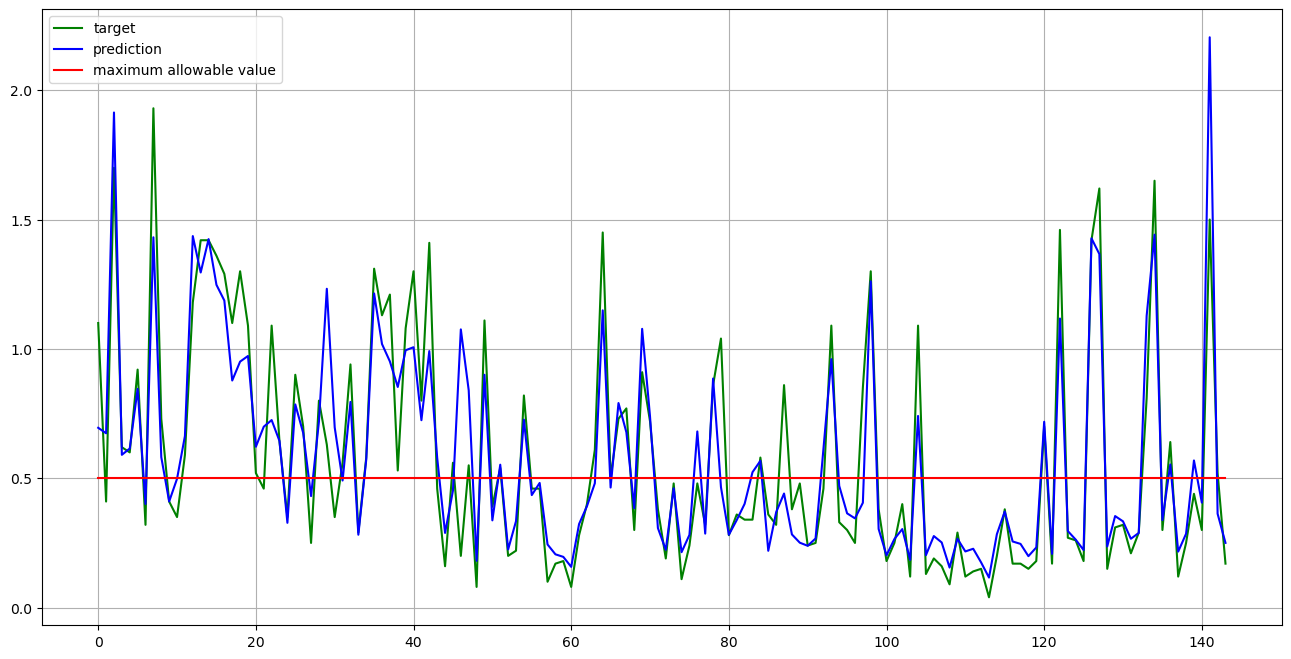

In [17]:
# Building plot for prediction for the training data 
x = np.arange(len(train))
plt.figure(figsize=(16,8))
plt.plot(x, target, label = "target", color = 'g')
plt.plot(x, y_train, label = "prediction", color = 'b')
plt.plot(x, np.full(len(train), 0.5), label = "maximum allowable value", color = 'r')
plt.legend(loc='best')
plt.grid(True)

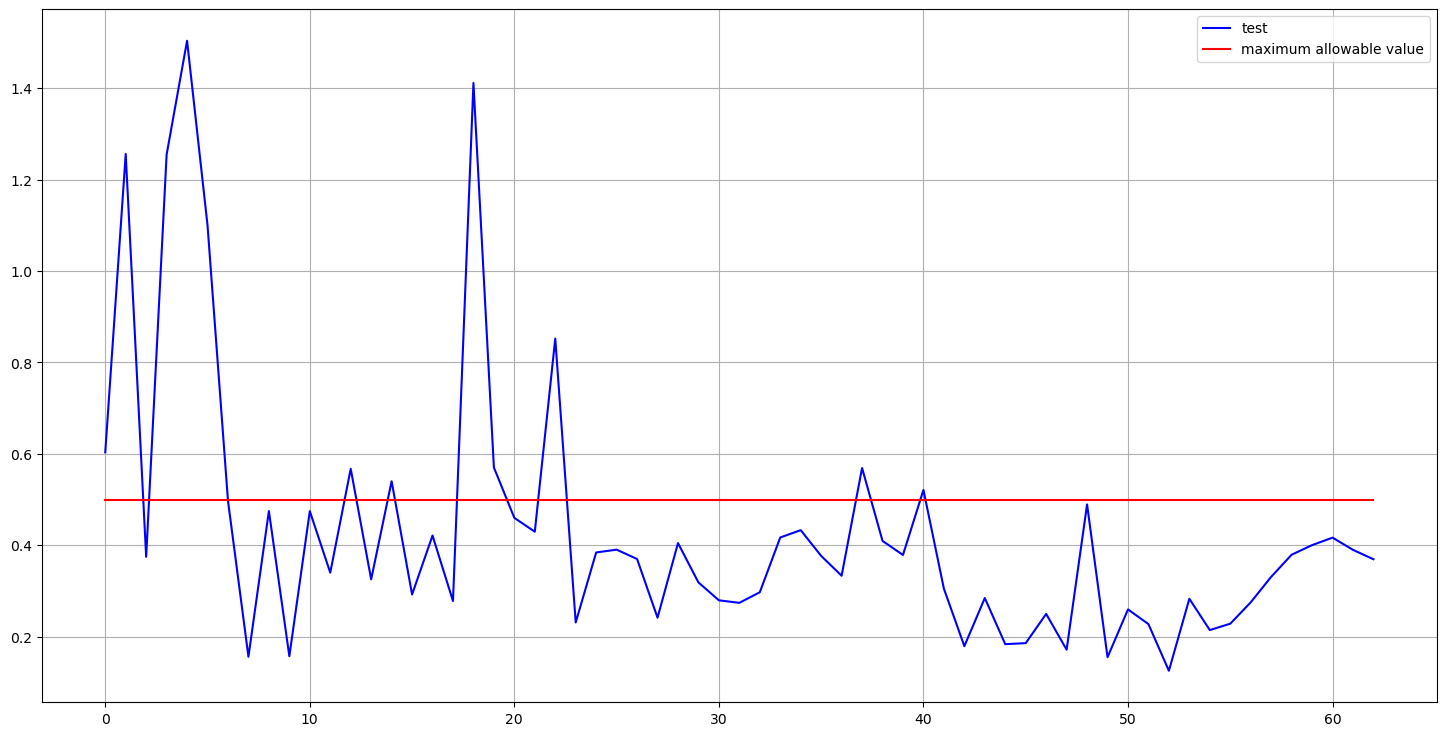

In [18]:
# Building plot for prediction for the test data
x = np.arange(len(test))
plt.figure(figsize = (18, 9))
plt.plot(x, y_test, label = 'test', color = 'b')
plt.plot(x, np.full(len(test), 0.5), label = "maximum allowable value", color = 'r')
plt.legend(loc = 'best')
plt.grid(True)

In [19]:
"CONCLUSION"

'CONCLUSION'

In [20]:
# Print rounded r2_score_acc to 2 decimal values after the text 'Accuracy of Linear Regression model is'
print(f'Accuracy of Linear Regression model is {round(r2_score_acc * 100, 2)}%')

Accuracy of Linear Regression model is 80.1%
